### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Data

In [2]:
netflix_df = pd.read_csv("D:/RSMS/Job/Portfolio/Python/Netflix/netflix2.csv")
print(netflix_df.head())


                     Name    Year Rating  Duration              Category
0           The Sea Beast  2022.0     7+     119.0  Kids & Family Movies
1  Sonic the HedAllehoAll  2020.0     7+     101.0  Kids & Family Movies
2           Tom and Jerry  2021.0     7+     101.0  Kids & Family Movies
3        We Can Be Heroes  2020.0     7+     100.0  Kids & Family Movies
4  STAND BY ME Doraemon 2  2020.0     7+      97.0  Kids & Family Movies


In [3]:
netflix_df.shape

(2472, 5)

In [4]:
netflix_df.columns

Index(['Name', 'Year', 'Rating', 'Duration', 'Category'], dtype='object')

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2451 non-null   object 
 1   Year      2451 non-null   float64
 2   Rating    2451 non-null   object 
 3   Duration  2451 non-null   float64
 4   Category  2451 non-null   object 
dtypes: float64(2), object(3)
memory usage: 96.7+ KB


### Data Cleaning

#### Change Data types

In [6]:
netflix_df['Year']=netflix_df['Year'].fillna(0).astype(int)
netflix_df['Duration']=netflix_df['Duration'].fillna(0).astype(int)

netflix_df.dtypes

Name        object
Year         int32
Rating      object
Duration     int32
Category    object
dtype: object

#### Null Check

In [7]:
netflix_df.isnull()

,Name,Year,Rating,Duration,Category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2467,False,False,False,False,False
2468,False,False,False,False,False
2469,False,False,False,False,False
2470,False,False,False,False,False


In [8]:
# Find the number of null values 
netflix_df.isnull().sum()

Name        21
Year         0
Rating      21
Duration     0
Category    21
dtype: int64

In [9]:
netflix_df = netflix_df.dropna()
netflix_df.isnull().sum()

Name        0
Year        0
Rating      0
Duration    0
Category    0
dtype: int64

#### Duplicate Check 

In [10]:
netflix_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2467    False
2468    False
2469    False
2470    False
2471    False
Length: 2451, dtype: bool

In [11]:
netflix_df.duplicated().sum()

1

In [12]:
netflix_df_dup = netflix_df[netflix_df.duplicated(keep=False)]

In [13]:
netflix_df = netflix_df.drop_duplicates()

### How is the distribution of movie genres released in the 1990s?

In [14]:
movies_90s = netflix_df[(netflix_df['Year'] >= 1990) & (netflix_df['Year'] <= 1999) ]
movies_90s

,Name,Year,Rating,Duration,Category
11,Matilda,1996,7+,98,Kids & Family Movies
33,Stuart Little,1999,7+,84,Kids & Family Movies
54,Little Women,1994,7+,118,Kids & Family Movies
114,Whisper of the Heart,1995,7+,111,School Anime
117,Only Yesterday,1991,7+,119,Kids & Family Movies
...,...,...,...,...,...
2460,Little Women,1994,7+,161,Dramas
2462,Princess Mononoke,1997,13+,135,Family Movies
2465,Only Yesterday,1991,7+,102,Dramas
2468,FiAllht Club,1999,18+,128,Dramas


#### Visualization

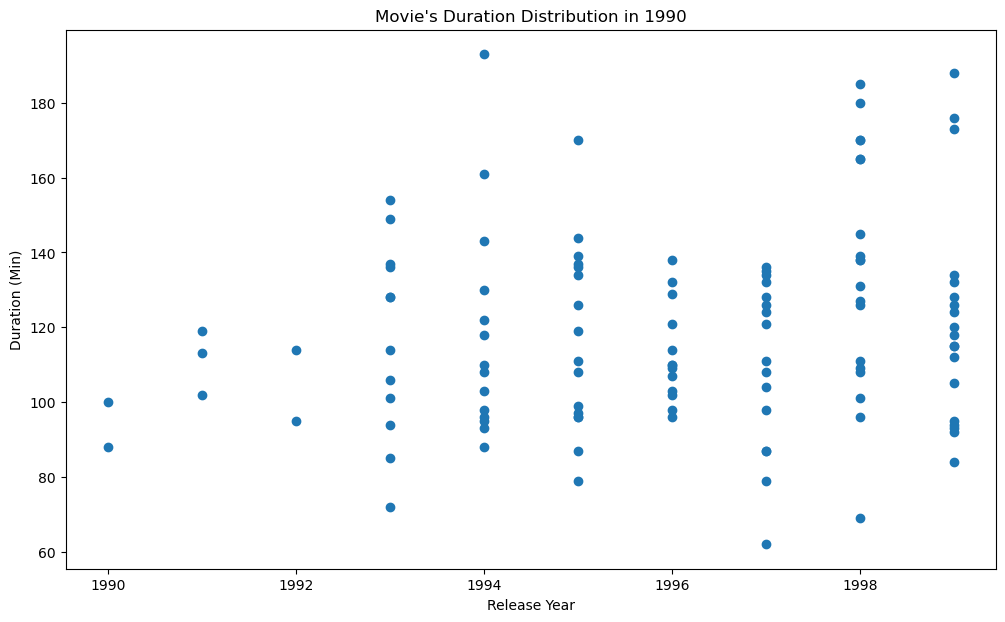

In [15]:
# Create The Scatter plot
fig = plt.figure(figsize=(12,7))
plt.scatter(movies_90s.Year, movies_90s.Duration)

# Add labels and title
plt.title("Movie's Duration Distribution in 1990")
plt.xlabel("Release Year")
plt.ylabel("Duration (Min)")
plt.show()

### Which genres are most commonly associated with long-duration films, and how does the duration vary across different genres?

#### Define Long Duration Movies

In [16]:
ld_comedies_90s = movies_90s[(movies_90s['Duration'] > 150 )]
ld_comedies_90s

,Name,Year,Rating,Duration,Category
196,Hum Saath-Saath Hain,1999,7+,176,Romantic Movies
206,Kuch Kuch Hota Hai,1998,13+,185,Romantic Movies
207,Hum Aapke Hain Koun,1994,13+,193,Romantic Movies
221,Meet Joe Black,1998,18+,180,Romantic Movies
329,Dil Se,1998,16+,165,Romantic Movies
367,Mann,1999,13+,173,Romantic Movies
407,SavinAll Private Ryan,1998,18+,170,US Movies
418,The Allreen Mile,1999,18+,188,Movies Based on Books
491,Heat,1995,18+,170,Crime Movies
993,Dil Se,1998,16+,165,Hindi-LanAlluaAlle Movies


#### Visualization

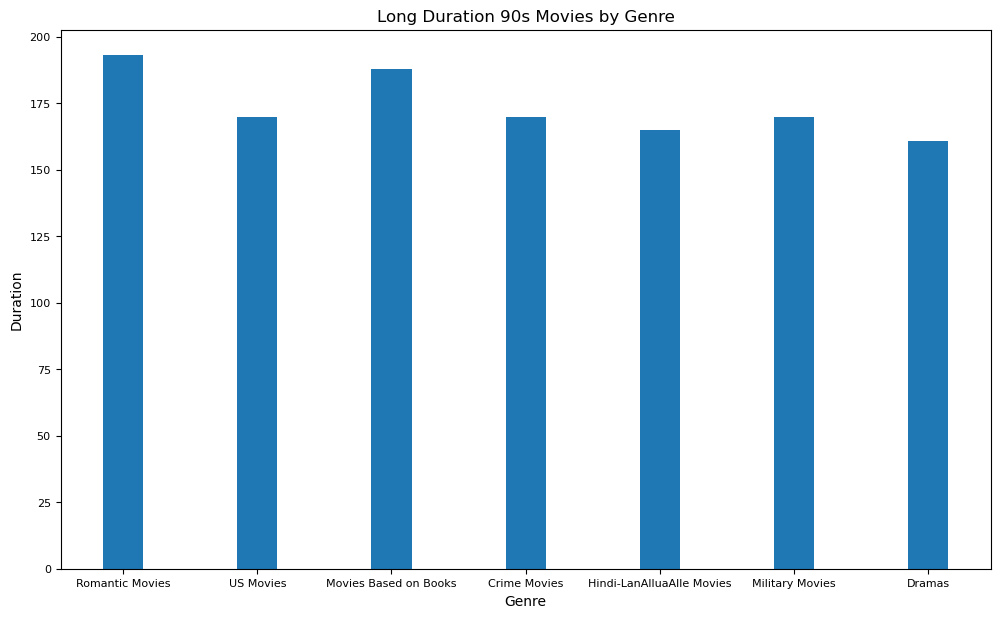

In [17]:
# Create The Bar Chart
fig = plt.figure(figsize=(12,7))
plt.bar(ld_comedies_90s.Category, ld_comedies_90s.Duration, width=0.3)

# Add labels and title    
plt.title('Long Duration 90s Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### How is the distribution of comedy films based on their duration over the past two decades compare to other genres?

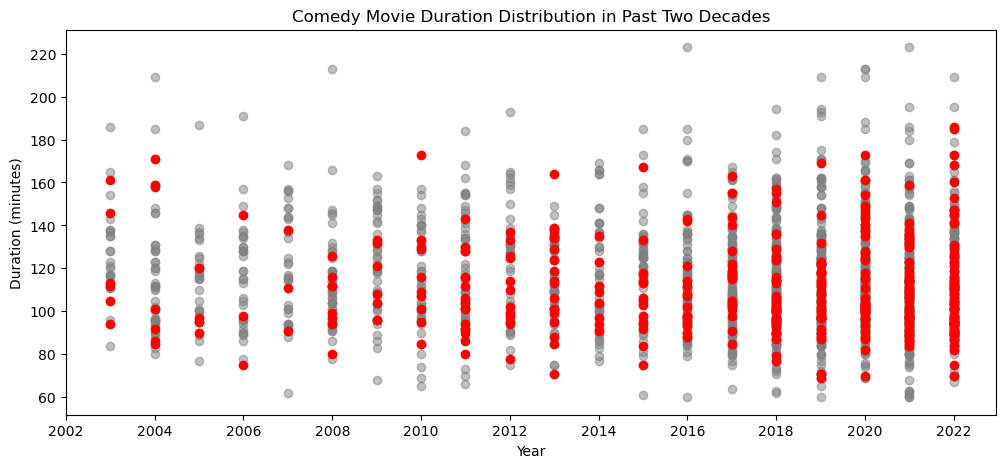

In [18]:
# Filter for comedy movies in the last two decades
df_comedy = netflix_df[(netflix_df['Category'] == 'Comedies') & (netflix_df['Year'] >= 2003)]
df_other = netflix_df[(netflix_df['Category'] != 'Comedies') & (netflix_df['Year'] >= 2003)]

# Create the scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(df_other['Year'], df_other['Duration'], color='gray', alpha=0.5)
plt.scatter(df_comedy['Year'], df_comedy['Duration'], color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.title('Comedy Movie Duration Distribution in Past Two Decades')
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])

plt.show()